# prepare data

Text(0.5, 1.0, 'X vs Y plot')

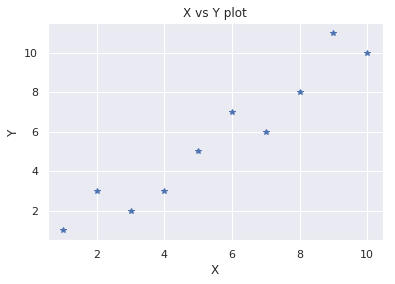

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
x = [1,2,4,3,5, 6, 7, 8, 9, 10]
y = [1,3,3,2,5, 7, 6, 8, 11, 10]
plt.plot(x,y, '*')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y plot')

# linear regression model: 
the model will look like this. 

> Y = B0 + B1*X 

Here: 

B1 is slop of predicted line and 

B0 is intersection on B0



# lets estimate the B1 
## Step 1: calculate mean of x and y 

In [2]:
# calculate the mean of x and y 
import numpy as np 
mean_y = np.mean(y)
mean_x = np.mean(x)
print('mean of y: ', mean_y)
print('mean of x: ', mean_x)

mean of y:  5.6
mean of x:  5.5


## Step 2: calculate: meanX - x and meanY - y
Residual of each y value from the mean.

Residual of each x value from the mean.

In [3]:
y_meany = y - mean_y 
x_meanx = x - mean_x
print('Residual of each y value from the mean.: ', y_meany)
print('Residual of each x value from the mean.: ', x_meanx)


Residual of each y value from the mean.:  [-4.6 -2.6 -2.6 -3.6 -0.6  1.4  0.4  2.4  5.4  4.4]
Residual of each x value from the mean.:  [-4.5 -3.5 -1.5 -2.5 -0.5  0.5  1.5  2.5  3.5  4.5]


## Step 3: Multiplication of the x and y residuals from their means.

In [4]:
mean_mul = y_meany*x_meanx
mean_mul

array([20.7,  9.1,  3.9,  9. ,  0.3,  0.7,  0.6,  6. , 18.9, 19.8])

## Step 4: sum of square of residuals of each x value from the mean and sum of multipltcation of x residuals from their means.

In [5]:
squareX = (x_meanx)**2
sum_X = np.sum(squareX)
sum_X
sum_meanmul = np.sum(mean_mul)
sum_meanmul

89.0

## B1 calculation 
### B1 = sum_X/sum_meanmul

In [6]:
B1 = np.sum(mean_mul)/np.sum(squareX)
B1

1.0787878787878789

# B0 calculation 
B0 = mean(y) − B1 × mean(x)

In [7]:
np.mean(y)

5.6

In [8]:
B0 = np.mean(y) - B1*np.mean(x)
print('B0: ', B0)

B0:  -0.3333333333333339


In [9]:
y1 =  np.array(x)*B1 +B0
y1

array([ 0.74545455,  1.82424242,  3.98181818,  2.9030303 ,  5.06060606,
        6.13939394,  7.21818182,  8.2969697 ,  9.37575758, 10.45454545])

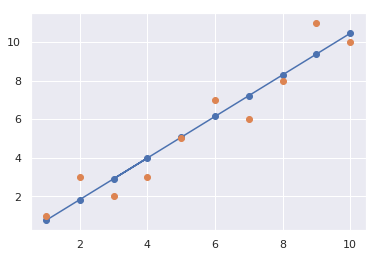

In [10]:
plt.plot(x,y1, '-o')
plt.plot(x,y, 'o')

# short cut method to calculate B1

B1 = corr(x, y) × [stdev(y)/stdev(x)]


In [11]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x, y)
B1 = corr*(np.std(x)/np.std(y))
B1

0.8524904214559388

In [12]:
B0 = np.mean(y) - B1*np.mean(x)
print('B0: ', B0)

B0:  0.9113026819923364


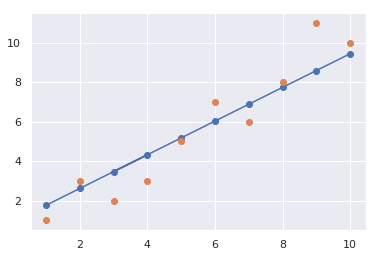

In [13]:
y1 =  np.array(x)*B1 +B0
plt.plot(x,y1, '-o')
plt.plot(x,y, 'o')

## RMSE error 

In [14]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [15]:
rmse(y1,y)

1.1230649256146386